This dataset includes all valid felony, misdemeanor, and violation crimes reported to the New York City Police Department (NYPD) from 2006 to the end of last year (2019). For additional details, please see the attached data dictionary in the ‘About’ section.

link: https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i

- Objetivo:

- Classificar se determinada é segura ou não com relação a ocorrência dr crimes de  assalto ou roubo.

## 1 - Carregando os dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('delitos_novo_nyc.csv',sep=',')

In [3]:
df.head()

,desc_instalacoes,delito,data_da_ocorr,hora_da_ocorr,conclusao,desc_delito,nivel_delito,loc_esp_delito,bairro,latitude,...,dia,mes,ano,dia_da_semana,idade_vitima,raca_vitima,sexo_vitima,noite,assalto,fds
0,COMMERCIAL BUILDING,THEFT-FRAUD,2006-01-01,00:01:00,1,"FRAUD,UNCLASSIFIED-FELONY",crime,dentro,Brooklyn,40.602071,...,1,1,2006,domingo,25-44,WHITE,M,1,0,0
1,RESIDENCE - APT. HOUSE,SEX CRIMES,2006-01-01,08:00:00,1,"SEXUAL ABUSE 3,2",contravencao,dentro,Brooklyn,40.680580,...,1,1,2006,domingo,<18,UNKNOWN,M,0,0,0
2,RESIDENCE - APT. HOUSE,FRAUDS,2006-01-01,00:01:00,1,"FRAUD,UNCLASSIFIED-MISDEMEANOR",contravencao,dentro,Brooklyn,40.675044,...,1,1,2006,domingo,45-64,WHITE HISPANIC,M,1,0,0
3,RESIDENCE - APT. HOUSE,THEFT-FRAUD,2006-01-01,10:00:00,1,"FRAUD,UNCLASSIFIED-FELONY",crime,dentro,Brooklyn,40.661964,...,1,1,2006,domingo,65+,BLACK,M,0,0,0
4,RESIDENCE-HOUSE,SEX CRIMES,2006-01-01,00:00:00,1,"SEXUAL ABUSE 3,2",contravencao,dentro,Bronx,40.856163,...,1,1,2006,domingo,25-44,BLACK,F,1,0,0


In [5]:
df.assalto.value_counts(normalize=True)

0    0.701557
1    0.298443
Name: assalto, dtype: float64

- Selecionando as colunas para a modelagem.

In [8]:
dados_ml = df[['hora','noite','dia','dia_da_semana','mes','fds',
                  'bairro','desc_instalacoes','sexo_vitima',
                  'latitude', 'longitude','assalto']]

In [9]:
dados_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400676 entries, 0 to 400675
Data columns (total 12 columns):
hora                400676 non-null int64
noite               400676 non-null int64
dia                 400676 non-null int64
dia_da_semana       400676 non-null object
mes                 400676 non-null int64
fds                 400676 non-null int64
bairro              400676 non-null object
desc_instalacoes    400676 non-null object
sexo_vitima         400676 non-null object
latitude            400676 non-null float64
longitude           400676 non-null float64
assalto             400676 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 36.7+ MB


- Tratando variáveis categóricas.

In [10]:

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

dados_ml['dia_da_semana'] = lb.fit_transform(dados_ml['dia_da_semana'])
dados_ml['bairro'] = lb.fit_transform(dados_ml['bairro'])
dados_ml['desc_instalacoes'] = lb.fit_transform(dados_ml['desc_instalacoes'])
dados_ml['sexo_vitima'] = lb.fit_transform(dados_ml['sexo_vitima'])

# dados_ml = pd.get_dummies(dados_ml)

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# for col in dados_ml.columns:
#   if col != "assalto":
#     dados_ml[col] = scaler.fit_transform(np.array(dados_ml[col]).reshape(-1,1))



/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/envs/py3env/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [11]:
dados_ml.head()

,hora,noite,dia,dia_da_semana,mes,fds,bairro,desc_instalacoes,sexo_vitima,latitude,longitude,assalto
0,0,1,1,0,1,0,1,18,1,40.602071,-74.002692,0
1,8,0,1,0,1,0,1,52,1,40.680580,-73.974317,0
2,0,1,1,0,1,0,1,52,1,40.675044,-73.896676,0
3,10,0,1,0,1,0,1,52,1,40.661964,-73.889912,0
4,0,1,1,0,1,0,0,54,0,40.856163,-73.844397,0


### Separando os dados de treino e teste.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = dados_ml.drop('assalto',axis=1)
Y = dados_ml['assalto']

In [14]:
X_treino, X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

## 4.2 **Testando algoritmos**

In [15]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

A acurácia do dummy mostfrequent foi 70.16%


Text(33,0.5,'Real ( 1 ou 0)')

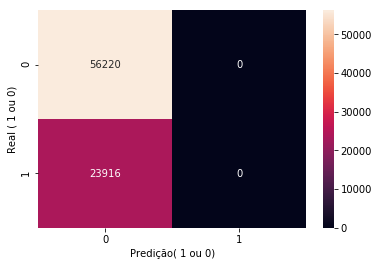

In [16]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [17]:
from sklearn.metrics import  roc_auc_score,roc_curve, classification_report
from sklearn import metrics

y_proba = dummy_clf.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:,1])

0.5

In [18]:
print(classification_report(Y_teste, y_pred))

             precision    recall  f1-score   support

          0       0.70      1.00      0.82     56220
          1       0.00      0.00      0.00     23916

avg / total       0.49      0.70      0.58     80136



/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Triagem com outros modelos

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         RandomForestClassifier(),
                         XGBClassifier()]

for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)

  print('Acuracia')
  train_acc = clf.score(X_treino, Y_treino)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression
Acuracia
Treino: 0.7015629874586635
Teste: 0.7015823100728761
ROC AUC
Treino 0.5858934371392576
Test 0.5873601075095694
GaussianNB
Acuracia
Treino: 0.6867785611780121
Teste: 0.6849855246081661
ROC AUC
Treino 0.6272132723880476
Test 0.6268335091383818
RandomForestClassifier
Acuracia
Treino: 0.9774942284894241
Teste: 0.6977638015373865
ROC AUC
Treino 0.9989736572011316
Test 0.6491011195266677
XGBClassifier
Acuracia


/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Treino: 0.7142915080801148
Teste: 0.7122142357991414
ROC AUC
Treino 0.6953113523792678
Test 0.6922125652162505


- Repetindo com validação cruzada.

In [20]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         RandomForestClassifier(),
                         XGBClassifier()]


for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)
  train_acc = clf.score(X_treino, Y_treino)
  val_score = cross_val_score(clf, X_treino, Y_treino, cv=5)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Validation score', val_score.mean())
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

LogisticRegression
Treino: 0.7015629874586635
Validation score 0.7015692268714647
Teste: 0.7015823100728761
ROC AUC
Treino 0.5858934371392576
Test 0.5873601075095694
GaussianNB
Treino: 0.6867785611780121
Validation score 0.6868191082857844
Teste: 0.6849855246081661
ROC AUC
Treino 0.6272132723880476
Test 0.6268335091383818
RandomForestClassifier
Treino: 0.9777001310288888
Validation score 0.6988363442161508
Teste: 0.6972396925227113
ROC AUC
Treino 0.9989910187392806
Test 0.6475991811789503
XGBClassifier
Treino: 0.7142915080801148
Validation score 0.7137705047592785
Teste: 0.7122142357991414
ROC AUC
Treino 0.6953113523792678
Test 0.6922125652162505


# Ajustando o XGBClassifier.

In [27]:
# clf = XGBClassifier(seed=42)
clf = XGBClassifier(max_depth=15,n_estimators=250,subsample=0.5,seed=42)

In [28]:
clf.fit(X_treino, Y_treino)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=250, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=0.5)

In [29]:
y_pred = clf.predict(X_teste)
acuracia = clf.score(X_teste, Y_teste) * 100

print('A acurácia do XGBclassifier foi %.2f%%' % acuracia)

A acurácia do XGBclassifier foi 71.05%


Text(33,0.5,'Real ( 1 ou 0)')

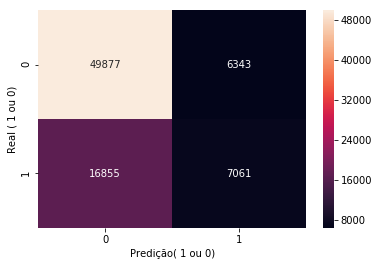

In [30]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [31]:
y_proba = clf.predict_proba(X_teste)[:,1]
roc_auc = roc_auc_score(Y_teste, y_proba)
roc_auc

0.6878244070956518

In [32]:
print(classification_report(Y_teste, y_proba>0.5))

             precision    recall  f1-score   support

          0       0.75      0.89      0.81     56220
          1       0.53      0.30      0.38     23916

avg / total       0.68      0.71      0.68     80136



# Austando o RandomForestClassifier.

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
clf = RandomForestClassifier(criterion='entropy',
                             class_weight='balanced',
                             max_features="log2",
                             max_depth=15,
                             n_estimators=250,
                             random_state=42)
clf.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=15, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=250, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [54]:
y_pred = clf.predict(X_teste)
acuracia = clf.score(X_teste, Y_teste) * 100

print('A acurácia do RandomForestclassifier foi %.2f%%' % acuracia)

A acurácia do RandomForestclassifier foi 66.24%


Text(33,0.5,'Real ( 1 ou 0)')

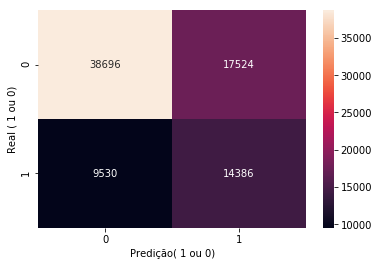

In [55]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [56]:
y_proba = clf.predict_proba(X_teste)[:,1]
roc_auc = roc_auc_score(Y_teste, y_proba)
roc_auc

0.6996866199521163

In [57]:
print(classification_report(Y_teste, y_proba>0.5))

             precision    recall  f1-score   support

          0       0.80      0.69      0.74     56220
          1       0.45      0.60      0.52     23916

avg / total       0.70      0.66      0.67     80136



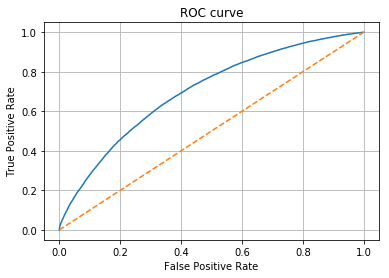

In [58]:
fpr, tpr, thresholds = metrics.roc_curve(Y_teste, y_proba)
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

 - Visualizando árvore de decisão de baixa profundidade.

In [56]:
# from sklearn.tree import plot_tree


# plt.figure(figsize=(20,10))
# annotations = plot_tree(clf.estimators_[0],
#                         feature_names=dados_ml.drop('conclusao',axis=1).columns,
#                         filled=True)

 - Salvando o modelo

In [85]:
import pickle

output = open('classificacao_assalto', 'wb')
pickle.dump(clf, output)
output.close()